# Numpy 정렬

* python에서 제공하는 리스트 정렬 함수 sort, sorted 제공
* 그러나, Numpy의 np.sort 가 더 효율적
* 관련 정렬 함수 
  - np.sort()
  - np.argsort()
  - np.lexsort()
  - np.searchsorted()
  - np.partition()

In [1]:
import numpy as np

### [ np.sort ]
- **np.sort**
  - 내부적으로 퀵 정렬 알고리즘을 사용하지만 kind 파라미터를 이용하여 병합정렬, 힙정렬 등도 사용 가능
  - 선언 
    - `numpy.sort(a, axis=-1, kind='quicksort', order=None)`
    - a : 정렬할 배열
    - kind = {'quicksort', 'mergesort', 'heapsort', 'stable' }    

###### 예) np.sort

In [10]:
x = np.array([2,1,4,3,5])
print(x)
print("ndim : ",x.ndim)
print("shape : ",x.shape)
print("size : ",x.size)

* Numpy 정렬 `np.sort(배열)` 사용

In [13]:
print("정렬된 상태 : ", np.sort(x))
print("원본 배열 : ",x)

정렬된 상태 :  [1 2 3 4 5]
원본 배열 :  [2 1 4 3 5]


* np.sort 는 원본 배열을 정렬하게 되지 않고 정렬된 배열을 반환한다

* python 리스트 정렬 함수 `리스트.sort()` 를 사용하면 원본 배열이 정렬됨

In [16]:
# python sort() 사용
a = [2,1,4,3,5]
print("원본배열 : ",a)
print(a.sort())       # 리스트 함수를 사용하면 Return 없음
print("정렬된 상태 : ",a)

원본배열 :  [2, 1, 4, 3, 5]
None
정렬된 상태 :  [1, 2, 3, 4, 5]


* python 정렬 내장 함수 `sorted(리스트)`를 사용하면 원본은 그대로 있고 정렬된 리스트가 반환됨

In [19]:
b = [2,1,4,3,5]
print("원본배열 : ",b)
print("정렬된 상태 : ", sorted(b)) # 내장 함수 sorted()를 사용하면 리스트 Return
print("원본배열 : ",b)

원본배열 :  [2, 1, 4, 3, 5]
정렬된 상태 :  [1, 2, 3, 4, 5]
원본배열 :  [2, 1, 4, 3, 5]


### [ np.argsort ]
- **np.argsort**
  - 정렬된 요소의 인덱스를 반환
  - 선언 
    - `numpy.argsort(a, axis=-1, kind='quicksort', order=None)`
    - a : 정렬할 배열
    - kind = {'quicksort', 'mergesort', 'heapsort', 'stable' }

###### 예) np.argsort

In [20]:
x = np.array([2,1,4,3,5])
print(x)
print("ndim : ",x.ndim)
print("shape : ",x.shape)
print("size : ",x.size)

[2 1 4 3 5]
ndim :  1
shape :  (5,)
size :  5


* x 배열의 인덱스와 그 값 
<pre><code>
x[0] = 2               1 = x[1] => 1
x[1] = 1               2 = x[0] => 0
x[2] = 4    --정렬-->   3 = x[3] => 3
x[3] = 3               4 = x[2] => 2
x[4] = 5               5 = x[4] => 4
</code></pre>

In [24]:
# 정렬된 배열의 인덱스 출력
print(np.argsort(x))
print("\n")
# 정렬된 배열의 인덱스를 가지고 배열의 값 출력
for index in np.argsort(x):
    print(x[index])

[1 0 3 2 4]


1
2
3
4
5


### [ np.lexsort ]
- **np.lexsort**
  - 여러키를 사용하여 정렬된 요소의 인덱스를 반환
  - 선언 
    - `numpy.lexsort(keys, axis=-1)`
    - key : 정렬할 배열을 리스트나 튜플로 입력, 키로 입력된 자료형의 마지막 항목이 기준이 됨([i,j,k] 일때 k 가 기준)
    - axis : 정렬할 축 

###### 예) np.lexsort - 이름 정렬

In [34]:
surnames =    ['Hertz',    'Galilei', 'Hertz']
first_names = ['Heinrich', 'Galileo', 'Gustav']
ind = np.lexsort([first_names, surnames])
print(ind)
print(type(ind))

[1 2 0]
<class 'numpy.ndarray'>


In [35]:
result = [surnames[i] + ", " + first_names[i] for i in ind]
print(result)
print(type(result))

['Galilei, Galileo', 'Hertz, Gustav', 'Hertz, Heinrich']
<class 'list'>


###### 예) np.lexsort - 두개의 숫자 배열 정렬

In [37]:
a = [1,5,1,4,3,4,4] # 1 column
b = [9,4,0,4,0,2,1] # 2 column
c = [10,20,30,40,50,60,70] # 3 column
ind = np.lexsort([c, b, a]) # Sort by a, then by b,c
print(ind)

[2 0 4 6 5 3 1]


In [38]:
result = [(a[i],b[i],c[i]) for i in ind]
print(result)

[(1, 0, 30), (1, 9, 10), (3, 0, 50), (4, 1, 70), (4, 2, 60), (4, 4, 40), (5, 4, 20)]


* **동일한 키값을 가질때 다음 기준의 키를 이용하여 정렬을 할 수 있음**

### [ np.searchsorted]
- **np.searchsorted**
  - 정렬된 배열에 값을 추가할때 어느 위치에 입력을 해야 순서가 그대로 정렬될지 입력할 위치를 반환
  - 선언 
    - `numpy.searchsorted(a, v, side='left', sorter=None)`
    - a : 입력할 배열(정렬된 배열) => 정렬안된 배열은 무조건 오름차순으로 정렬해서 입력해야함
    - v : a에 삽입할 값
    - side : {'left', 'right'} 
    - left는 첫번째 적합한 위치를 찾았을때 그 인덱스 반환
    - right는 마지막 적합한 위치를 찾았을때 그 인덱스 반환

###### 예) np.searchsorted 1

In [43]:
# 입력된 배열에 3이 들어갈 위치 반환 (default side = left)
np.searchsorted([1,2,3,4,5], 3)

2

In [46]:
# 입력된 배열에 3이 들어갈 위치 반환 side = right
np.searchsorted([1,2,3,4,5], 3, side='right')

3

In [47]:
# 입력된 배열에 -10, 10, 2, 3 이 들어갈 위치를 배열로 반환
np.searchsorted([1,2,3,4,5], [-10, 10, 2, 3])

array([0, 5, 1, 2])

###### 예) np.searchsorted 2

In [48]:
sample = np.arange(0, 20, 2)
print(sample)

[ 0  2  4  6  8 10 12 14 16 18]


In [68]:
value = 8
result = np.searchsorted(sample, value)
print("입력할 위치의 index 는 ",result)
print(value,"은 ", sample[result-1],"과 ",sample[result],"사이에 입력")

입력할 위치의 index 는  4
8 은  6 과  8 사이에 입력


In [69]:
value = 8
result = np.searchsorted(sample, value, side='right')
print("입력할 위치의 index 는 ",result)
print(value,"은 ", sample[result-1],"과 ",sample[result],"사이에 입력")

입력할 위치의 index 는  5
8 은  8 과  10 사이에 입력


###### 예) np.searchsorted 3

In [73]:
arr = [1,1,1,4,4,5,4,7,7,7]
print(arr)

[1, 1, 1, 4, 4, 5, 4, 7, 7, 7]


In [74]:
value = 4
result = np.searchsorted(arr, value)
print("입력할 위치의 index 는 ",result)
print(value,"은 ", arr[result-1],"과 ",arr[result],"사이에 입력")

입력할 위치의 index 는  3
4 은  1 과  4 사이에 입력


In [75]:
value = 4
result = np.searchsorted(arr, value, side='right')
print("입력할 위치의 index 는 ",result)
print(value,"은 ", arr[result-1],"과 ",arr[result],"사이에 입력")

입력할 위치의 index 는  5
4 은  4 과  5 사이에 입력


* **입력할 위치를 찾을때 왼쪽부터 찾기를 시작함(index 0 부터 위치를 찾음)**
* 그래서 정렬된 배열이  입력값(`a`)으로 들어가야함

### [ np.partition]
- **np.partition**
  - 전체 배열을 정렬할 필요가 없으면 단순희 배열안에서 k개(kth)만큼만 정렬이 필요할때 사용
  - k번째 인덱스 까지만 정렬된 데이터가 나오며 나머지는 랜덤하게 채워진 배열이 반환됨(k개 정렬된 값들은 그것들 사이에 정렬은 안됨)
  - 선언 
    - `numpy.partition(a, kth, axis=-1, kind='introselect', order=None)`
    - a : 정렬할 배열
    - kth : 어디까지 정렬할지 입력

###### 예) np.partition

In [76]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

In [78]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)
np.partition(X, 2, axis=1)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

## Example: k-Nearest Neighbors

* 2차원 평면에 10개의 점을 생성

In [135]:
rand = np.random.RandomState(42)
X = rand.rand(10, 2)
print(X)
print("ndim : ",X.ndim)
print("shape : ",X.shape)
print("size : ",X.size)

[[0.37454012 0.95071431]
 [0.73199394 0.59865848]
 [0.15601864 0.15599452]
 [0.05808361 0.86617615]
 [0.60111501 0.70807258]
 [0.02058449 0.96990985]
 [0.83244264 0.21233911]
 [0.18182497 0.18340451]
 [0.30424224 0.52475643]
 [0.43194502 0.29122914]]
ndim :  2
shape :  (10, 2)
size :  20


* 10개의 점의 분포 확인

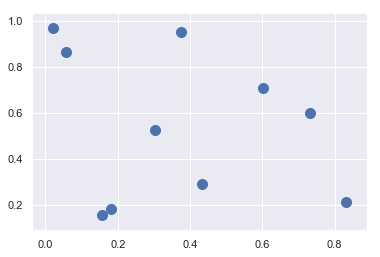

In [136]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling
plt.scatter(X[:, 0], X[:, 1], s=100);

* 각 점들 사이의 거리 계산
  * 두점사이의거리제곱 = 각 차원간의 차이를 제곱해서 더한값

___
dist_sq(두점사이의 거리의 제곱) 중간과정 

In [137]:
#(10,2) - > (10,1,2) 로 차원 추가
print(X[:, np.newaxis, :])
print(X[:, np.newaxis, :].shape)

[[[0.37454012 0.95071431]]

 [[0.73199394 0.59865848]]

 [[0.15601864 0.15599452]]

 [[0.05808361 0.86617615]]

 [[0.60111501 0.70807258]]

 [[0.02058449 0.96990985]]

 [[0.83244264 0.21233911]]

 [[0.18182497 0.18340451]]

 [[0.30424224 0.52475643]]

 [[0.43194502 0.29122914]]]
(10, 1, 2)


In [138]:
# (10,2) -> (1, 10, 2) 로 차원 추가
print(X[np.newaxis, :, : ])
print(X[np.newaxis, :, : ].shape)

[[[0.37454012 0.95071431]
  [0.73199394 0.59865848]
  [0.15601864 0.15599452]
  [0.05808361 0.86617615]
  [0.60111501 0.70807258]
  [0.02058449 0.96990985]
  [0.83244264 0.21233911]
  [0.18182497 0.18340451]
  [0.30424224 0.52475643]
  [0.43194502 0.29122914]]]
(1, 10, 2)


In [139]:
step1 = X[:, np.newaxis, :] - X[np.newaxis, :, :]
print(step1)

[[[ 0.          0.        ]
  [-0.35745382  0.35205582]
  [ 0.21852148  0.79471979]
  [ 0.31645651  0.08453816]
  [-0.22657489  0.24264173]
  [ 0.35395562 -0.01919555]
  [-0.45790252  0.7383752 ]
  [ 0.19271515  0.7673098 ]
  [ 0.07029788  0.42595787]
  [-0.0574049   0.65948517]]

 [[ 0.35745382 -0.35205582]
  [ 0.          0.        ]
  [ 0.5759753   0.44266396]
  [ 0.67391033 -0.26751766]
  [ 0.13087893 -0.10941409]
  [ 0.71140945 -0.37125137]
  [-0.1004487   0.38631937]
  [ 0.55016897  0.41525397]
  [ 0.4277517   0.07390205]
  [ 0.30004892  0.30742934]]

 [[-0.21852148 -0.79471979]
  [-0.5759753  -0.44266396]
  [ 0.          0.        ]
  [ 0.09793503 -0.71018163]
  [-0.44509637 -0.55207806]
  [ 0.13543415 -0.81391533]
  [-0.676424   -0.05634459]
  [-0.02580633 -0.02740999]
  [-0.1482236  -0.36876191]
  [-0.27592638 -0.13523462]]

 [[-0.31645651 -0.08453816]
  [-0.67391033  0.26751766]
  [-0.09793503  0.71018163]
  [ 0.          0.        ]
  [-0.5430314   0.15810357]
  [ 0.03749912

In [140]:
step2 = step1 **2 
print(step2)

[[[0.00000000e+00 0.00000000e+00]
  [1.27773236e-01 1.23943302e-01]
  [4.77516365e-02 6.31579538e-01]
  [1.00144721e-01 7.14670060e-03]
  [5.13361821e-02 5.88750085e-02]
  [1.25284584e-01 3.68468977e-04]
  [2.09674720e-01 5.45197930e-01]
  [3.71391297e-02 5.88764324e-01]
  [4.94179135e-03 1.81440111e-01]
  [3.29532252e-03 4.34920684e-01]]

 [[1.27773236e-01 1.23943302e-01]
  [0.00000000e+00 0.00000000e+00]
  [3.31747548e-01 1.95951385e-01]
  [4.54155132e-01 7.15656993e-02]
  [1.71292943e-02 1.19714439e-02]
  [5.06103402e-01 1.37827578e-01]
  [1.00899411e-02 1.49242658e-01]
  [3.02685901e-01 1.72435863e-01]
  [1.82971516e-01 5.46151337e-03]
  [9.00293563e-02 9.45128016e-02]]

 [[4.77516365e-02 6.31579538e-01]
  [3.31747548e-01 1.95951385e-01]
  [0.00000000e+00 0.00000000e+00]
  [9.59126976e-03 5.04357941e-01]
  [1.98110780e-01 3.04790182e-01]
  [1.83424079e-02 6.62458167e-01]
  [4.57549428e-01 3.17471286e-03]
  [6.65966501e-04 7.51307525e-04]
  [2.19702363e-02 1.35985347e-01]
  [7.61353

* np.sum() axis = -1 은 우리 예제에서 3차원 이기때문에 axis=2와 동일함

In [141]:
step3_r = np.sum(step2,axis=-1)
step3_r2 = np.sum(step2,axis=2)
print(step3_r == step3_r2)

[[ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]]


In [142]:
print(step3_r)

[[0.         0.25171654 0.67933117 0.10729142 0.11021119 0.12565305
  0.75487265 0.62590345 0.1863819  0.43821601]
 [0.25171654 0.         0.52769893 0.52572083 0.02910074 0.64393098
  0.1593326  0.47512176 0.18843303 0.18454216]
 [0.67933117 0.52769893 0.         0.51394921 0.50290096 0.68080058
  0.46072414 0.00141727 0.15795558 0.09442377]
 [0.10729142 0.52572083 0.51394921 0.         0.31987984 0.01216687
  1.02713477 0.48148903 0.17716149 0.47033641]
 [0.11021119 0.02910074 0.50290096 0.31987984 0.         0.40557444
  0.29926414 0.45108072 0.12173825 0.20237694]
 [0.12565305 0.64393098 0.68080058 0.01216687 0.40557444 0.
  1.23302708 0.64458914 0.27862329 0.62982499]
 [0.75487265 0.1593326  0.46072414 1.02713477 0.29926414 1.23302708
  0.         0.42414057 0.37660024 0.16662198]
 [0.62590345 0.47512176 0.00141727 0.48148903 0.45108072 0.64458914
  0.42414057 0.         0.13150712 0.07418619]
 [0.1863819  0.18843303 0.15795558 0.17716149 0.12173825 0.27862329
  0.37660024 0.13150

In [143]:
print(step3_r2)

[[0.         0.25171654 0.67933117 0.10729142 0.11021119 0.12565305
  0.75487265 0.62590345 0.1863819  0.43821601]
 [0.25171654 0.         0.52769893 0.52572083 0.02910074 0.64393098
  0.1593326  0.47512176 0.18843303 0.18454216]
 [0.67933117 0.52769893 0.         0.51394921 0.50290096 0.68080058
  0.46072414 0.00141727 0.15795558 0.09442377]
 [0.10729142 0.52572083 0.51394921 0.         0.31987984 0.01216687
  1.02713477 0.48148903 0.17716149 0.47033641]
 [0.11021119 0.02910074 0.50290096 0.31987984 0.         0.40557444
  0.29926414 0.45108072 0.12173825 0.20237694]
 [0.12565305 0.64393098 0.68080058 0.01216687 0.40557444 0.
  1.23302708 0.64458914 0.27862329 0.62982499]
 [0.75487265 0.1593326  0.46072414 1.02713477 0.29926414 1.23302708
  0.         0.42414057 0.37660024 0.16662198]
 [0.62590345 0.47512176 0.00141727 0.48148903 0.45108072 0.64458914
  0.42414057 0.         0.13150712 0.07418619]
 [0.1863819  0.18843303 0.15795558 0.17716149 0.12173825 0.27862329
  0.37660024 0.13150

dist_sq(두점사이의 거리의 제곱) 중간과정 끝 
___

In [144]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)

In [145]:
print(dist_sq)
print("ndim : ",dist_sq.ndim)
print("shape : ", dist_sq.shape)
print("size : ",dist_sq.size)

[[0.         0.25171654 0.67933117 0.10729142 0.11021119 0.12565305
  0.75487265 0.62590345 0.1863819  0.43821601]
 [0.25171654 0.         0.52769893 0.52572083 0.02910074 0.64393098
  0.1593326  0.47512176 0.18843303 0.18454216]
 [0.67933117 0.52769893 0.         0.51394921 0.50290096 0.68080058
  0.46072414 0.00141727 0.15795558 0.09442377]
 [0.10729142 0.52572083 0.51394921 0.         0.31987984 0.01216687
  1.02713477 0.48148903 0.17716149 0.47033641]
 [0.11021119 0.02910074 0.50290096 0.31987984 0.         0.40557444
  0.29926414 0.45108072 0.12173825 0.20237694]
 [0.12565305 0.64393098 0.68080058 0.01216687 0.40557444 0.
  1.23302708 0.64458914 0.27862329 0.62982499]
 [0.75487265 0.1593326  0.46072414 1.02713477 0.29926414 1.23302708
  0.         0.42414057 0.37660024 0.16662198]
 [0.62590345 0.47512176 0.00141727 0.48148903 0.45108072 0.64458914
  0.42414057 0.         0.13150712 0.07418619]
 [0.1863819  0.18843303 0.15795558 0.17716149 0.12173825 0.27862329
  0.37660024 0.13150

___
np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1) 의 상세 단계 확인

In [146]:
# 각 쌍의 점 사이의 좌표의 차이를 계산
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [85]:
# 좌표의 차이를 제곱함
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [148]:
# 제곱 거리를 구하기 위해 좌표 차이를 더함
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

확인 끝
___

In [149]:
# 자기 자신과의 거리가 0인지 확인 하기 위함
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [152]:
# 제곱 거리의 값들을  argsort를 이용하여 크기 순으로 정렬한 인덱스를 반환함
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 9 7 1 4 2 5 6 8]
 [1 4 7 9 3 6 8 5 0 2]
 [2 1 4 6 3 0 8 9 7 5]
 [3 9 7 0 1 4 5 8 6 2]
 [4 1 8 5 6 7 9 3 0 2]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 0 5 8 6 2]
 [8 5 6 4 1 7 9 3 2 0]
 [9 7 3 0 1 4 5 8 6 2]]


* `numpy.argpartition(a, kth, axis=-1, kind='introselect', order=None)`

In [153]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

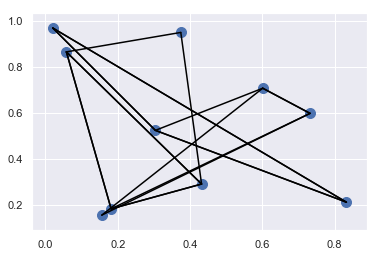

In [154]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# draw lines from each point to its two nearest neighbors
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')